In [1]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the image

In [2]:
image = cv2.imread('img2.jpg')

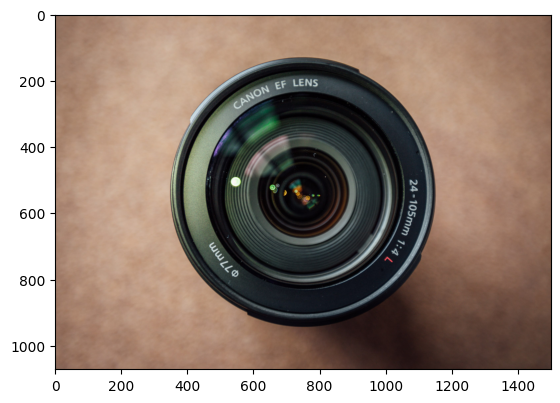

In [3]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

we use the compress function from last excersise to simplify the image a little bit to make it a little more cartoon like

In [4]:
def color_reduction(image, n_colors, color_space=None):
    # Load image and convert to numpy array
    img = Image.open(image)
    img = np.array(img, dtype=np.float32) / 255

    # Convert image to specified color space
    if color_space == 'HSV':
        img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    elif color_space == 'LAB':
        img = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
    elif color_space == 'YUV':
        img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    elif color_space == 'YCrCb':
        img = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    elif color_space == 'XYZ':
        img = cv2.cvtColor(img, cv2.COLOR_RGB2XYZ)

    # Transform image into 2D array of pixels
    w, h, d = tuple(img.shape)
    image_array = np.reshape(img, (w * h, d))

    # Fit KMeans model to the data
    kmeans = KMeans(n_clusters=n_colors).fit(image_array)

    # Get labels for all points
    labels = kmeans.predict(image_array)

    # Create compressed image
    compressed_image = np.zeros((w, h, d), dtype=np.float32)
    label_idx = 0
    for i in range(w):
        for j in range(h):
            compressed_image[i][j] = kmeans.cluster_centers_[labels[label_idx]]
            label_idx += 1

    # Convert compressed image back to RGB color space
    if color_space == 'HSV':
        compressed_image = cv2.cvtColor(compressed_image, cv2.COLOR_HSV2RGB)
    elif color_space == 'LAB':
        compressed_image = cv2.cvtColor(compressed_image, cv2.COLOR_LAB2RGB)
    elif color_space == 'YUV':
        compressed_image = cv2.cvtColor(compressed_image, cv2.COLOR_YUV2RGB)
    elif color_space == 'YCrCb':
        compressed_image = cv2.cvtColor(compressed_image, cv2.COLOR_YCrCb2RGB)
    elif color_space == 'XYZ':
        compressed_image = cv2.cvtColor(compressed_image, cv2.COLOR_XYZ2RGB)

    return compressed_image

def display_compressed_image(compressed_image):
    plt.imshow(compressed_image)

we re draw the image here but using only 5 colors

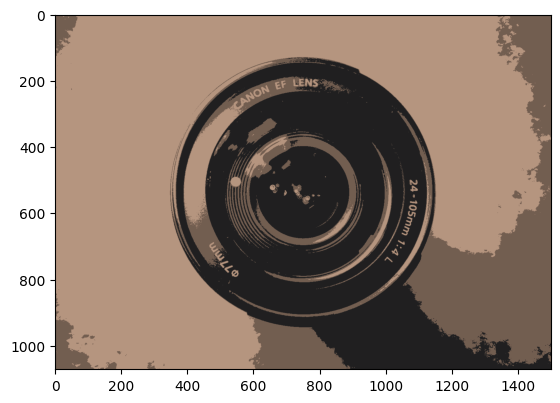

In [40]:
compressed_image = color_reduction('img2.jpg', 5, 'YCrCb')
display_compressed_image(compressed_image)

we convert the image to grayscale since edge detection works better on grayscale images, because by doing so we make the image simpler, so it will require less computing power to calculate the edges also edge detection algorithms are based on changes in contrast, since we only have two colors in grayscale images the contrast is easier to detect 

we also blur the image before applying an edge detection algorithm because blurring before detecting edges helps us remove noise in the image so the algorithm won't detect some edges that aren't actually edges 
Here use Gaussian blur to blur out unimportant details of our image

The filter we use to find the edges of the picture is called bilateral filter

A bilateral filter is a non-linear filter that can smooth out an image while reducing noise and preserving edges and details. It does this by applying a weighted average to each pixel, where the weights are based on both the distance between pixels and the difference in their intensities.

Both the median filter and bilateral filter are non-linear filters used for noise reduction in image processing. However, there are several key differences between them. The median filter replaces each pixel with the median value of its neighboring pixels, while the bilateral filter uses a weighted average based on distance and intensity similarity. The bilateral filter generally produces smoother results with less loss of detail than the median filter and is designed to preserve edges and boundaries. However, it is more computationally intensive and may take longer to apply. Both filters have parameters that need to be tuned for optimal results.

Ultimately, the choice between the median filter and bilateral filter depends on the specific characteristics of the image and the desired level of noise reduction. The median filter may be a good choice for images with a lot of salt-and-pepper noise or if speed is a concern. The bilateral filter may be a better option if preserving edges and producing smoother results are priorities, even though it is more computationally expensive.

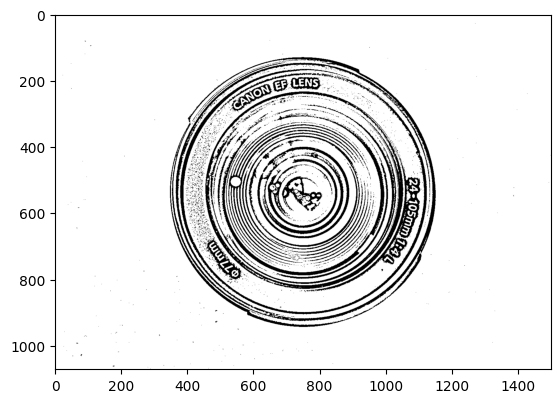

In [41]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred_gray =  cv2.bilateralFilter(compressed_image,5,75,75)
edges  = cv2.adaptiveThreshold(blurred_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 27, 5)
plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))

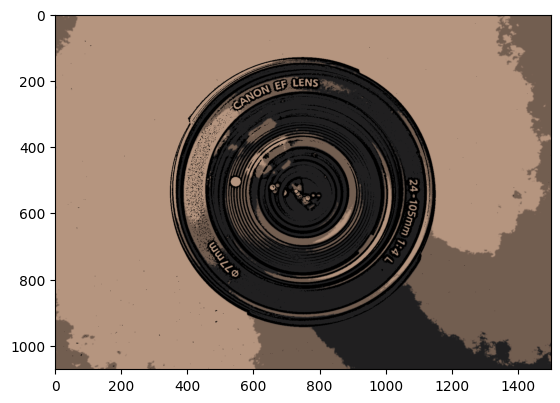

In [48]:
cartoon = cv2.bitwise_and(compressed_image, compressed_image, mask=edges)
display_compressed_image(cartoon)